In [177]:
import sys
import re
import datetime
from math import log
import csv
import pprint
import math
import random
from collections import Counter
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
from elasticsearch import Elasticsearch, helpers

from __future__ import division

%matplotlib inline

np.set_printoptions(threshold=sys.maxint)
pd.set_option('display.max_rows', 1000)

pp = pprint.PrettyPrinter()

In [60]:
input_file = 'task_cms_90d_es.csv'

In [64]:
df = pd.read_csv(input_file, dtype={'cpu_n': 'float'})

In [133]:
pp.pprint(df.axes[1])

Index([u'request', u'tasktype', u'site', u'type', u'njobs', u'cpuevt_avg',
       u'cpuevt_rms', u'wallevt_avg', u'wallevt_rms', u'cpu', u'cpu_avg',
       u'wc', u'wc_avg', u'cores', u'evts', u'eff', u'ramcore', u'input',
       u'output', u'inevt', u'outevt', u'inrate'],
      dtype='object')


In [197]:
def make_plot(df, var, bins=100, rg=None, log=False, xlab=None, ylab=None, xunit=None):
    grouped = df.groupby(['request'], as_index=False)
    a = grouped[var].mean()
    tr = scipy.stats.trim1(a[var], 0.01)   # trimming the top 1% of values to ignore outliers
    mu = np.mean(tr)
    sigma = np.std(tr)
    if rg == 'auto':
        rg = [0., min(mu*10., mu+sigma*10.)]
    fig = a[var].hist(bins=bins, log=log, range=rg)
    stats = r'$\mu=%.3f\pm%.3f\ %s$' % (mu, sigma, xunit)
    t_x = lambda x: fig.get_xlim()[0] + (fig.get_xlim()[1] - fig.get_xlim()[0]) * x
    t_y = lambda x: fig.get_ylim()[0] + (fig.get_ylim()[1] - fig.get_ylim()[0]) * x
    if log:
        fig.text(t_x(.4), fig.get_ylim()[0] * (fig.get_ylim()[1] / fig.get_ylim()[0])**.7, stats)
    else:
        fig.text(t_x(.4), t_y(.7), stats)
    plt.xlabel(xlab + '(' + xunit + ')')
    plt.ylabel(ylab)

In [80]:
df_a = df[df.type == 'analysis']
df_p = df[df.type == 'production']

## Analysis

In [196]:
plt.rcParams.update({'font.size': 12})

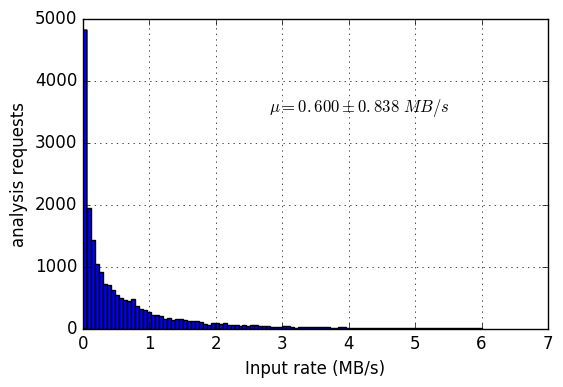

In [206]:
make_plot(df_a, 'inrate', rg='auto', log=False, xlab='Input rate ', ylab='analysis requests', xunit='MB/s')

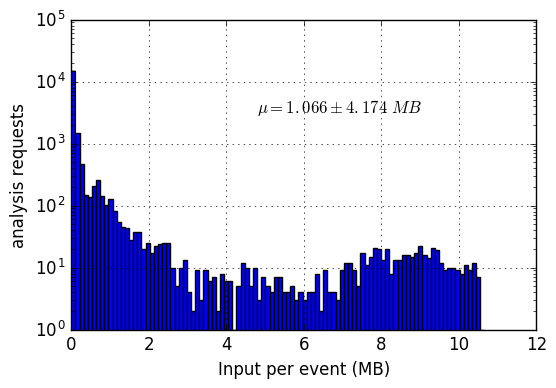

In [208]:
make_plot(df_a, 'inevt', rg='auto', log=True, xlab='Input per event ', ylab='analysis requests', xunit='MB')

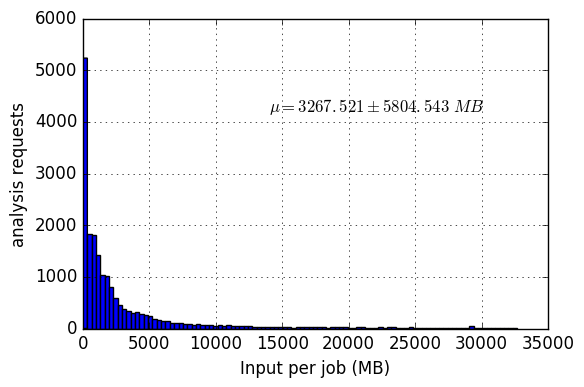

In [209]:
make_plot(df_a, 'input', rg='auto', log=False, xlab='Input per job ', ylab='analysis requests', xunit='MB')

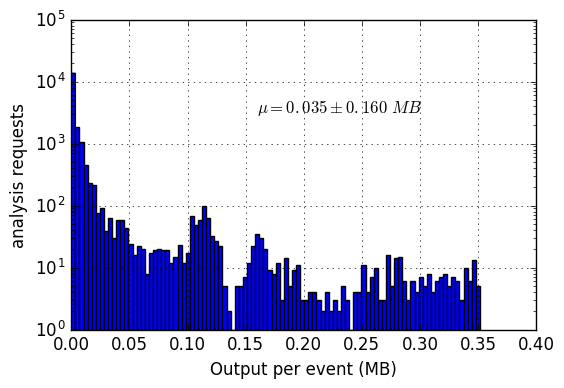

In [211]:
make_plot(df_a, 'outevt', rg='auto', log=True, xlab='Output per event ', ylab='analysis requests', xunit='MB')

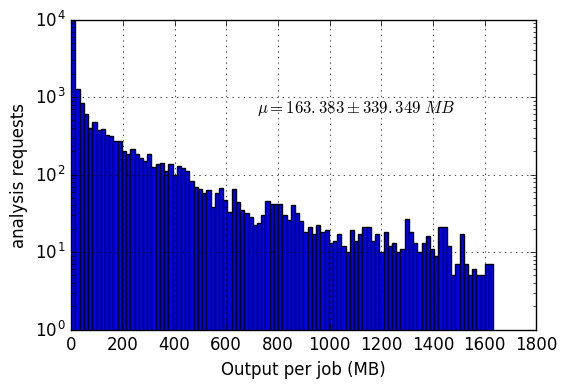

In [213]:
make_plot(df_a, 'output', rg='auto', log=True, xlab='Output per job ', ylab='analysis requests', xunit='MB')

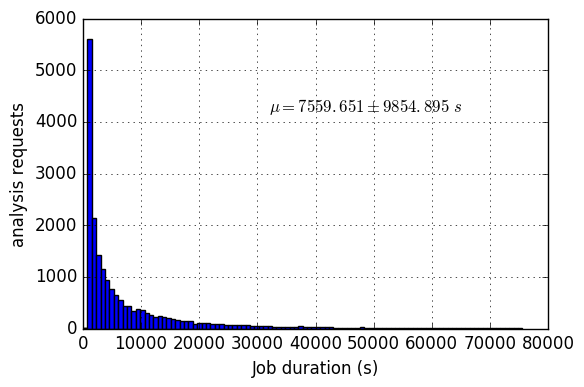

In [203]:
make_plot(df_a, 'wc_avg', rg='auto', log=False, xlab='Job duration ', ylab='analysis requests', xunit='s')

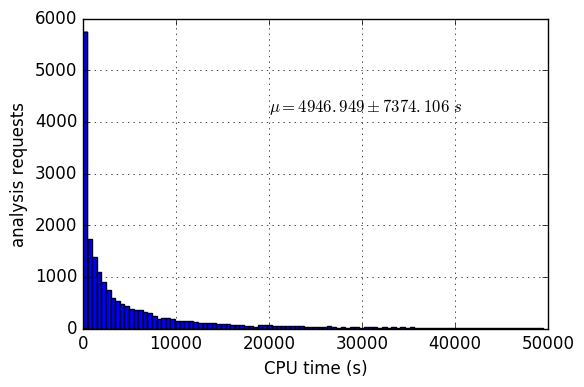

In [204]:
make_plot(df_a, 'cpu_avg', rg='auto', log=False, xlab='CPU time ', ylab='analysis requests', xunit='s')

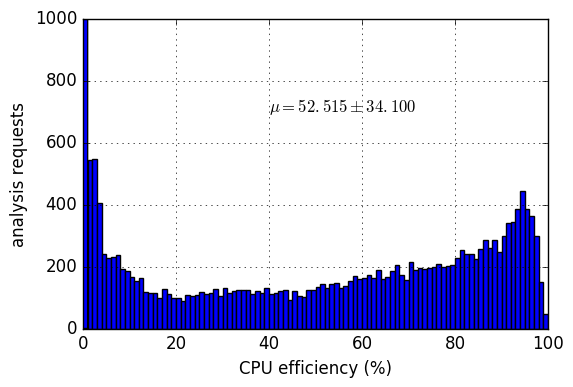

In [205]:
make_plot(df_a, 'eff', rg=[0., 100.], log=False, xlab='CPU efficiency ', ylab='analysis requests', xunit='%')